In [1]:
import pandas as pd
import datetime as dt

In [2]:
df1=pd.read_csv('takehome_user_engagement.csv')

In [3]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df2=pd.read_csv('Desktop/Springboard/Relax Challenge/takehome_users.csv',encoding='latin-1')

In [5]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df1['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [7]:
df1.shape

(207917, 3)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
df1['time_stamp']=pd.to_datetime(df1['time_stamp'])

In [10]:
df1.set_index('time_stamp',inplace=True)

In [11]:
df1_new=df1.groupby([pd.Grouper(freq='w'),'user_id']).sum()
df1_new.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

Finding adopted users (a user who has logged into the product on three separate days in at least one seven day period).

In [12]:
df_adopted=df1_new[df1_new['visited']>=3].unstack().melt()
df_adopted.head()

,NaN,user_id,value
0,visited,1693,3.0
1,visited,1693,NaN
2,visited,1693,3.0
3,visited,1693,NaN
4,visited,1693,3.0


Now, we find the unique id's which user logged into the product more than three times in a week.

In [13]:
user_list=df_adopted.dropna().user_id.unique()

In [14]:
user_list

array([ 1693,   728, 11764, ...,  9870, 10746,  8460])

In [15]:
user_df=pd.DataFrame(data=user_list, columns=['user_id'])

In [16]:
import numpy as np
df2['adopted']=df2['object_id'].isin(user_df['user_id'])


Finding percentage of adopoted users in total users:

In [17]:
df2['adopted'].value_counts()/df2.shape[0]

False    0.879583
True     0.120417
Name: adopted, dtype: float64

Now, we explore the users dataframe to make it ready to predict adopted users:

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [19]:
df2['creation_time']=pd.to_datetime(df2['creation_time'])

In [20]:
df2['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [21]:
df2['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [22]:
df2['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [23]:
# day of the week account created
df2['day_created'] = df2['creation_time'].apply(lambda x: x.dayofweek)
# hour of the day account created
df2['hour_created'] = df2['creation_time'].apply(lambda x: x.hour)

In [24]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day_created,hour_created
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,1,3
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,4,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,1,23
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,1,8
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,3,10


In [25]:
# Finding missing values:
missing=pd.concat([df2.isnull().sum(),100*df2.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
object_id,0,0.000
creation_time,0,0.000
name,0,0.000
email,0,0.000
creation_source,0,0.000
opted_in_to_mailing_list,0,0.000
enabled_for_marketing_drip,0,0.000
org_id,0,0.000
adopted,0,0.000
day_created,0,0.000


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day_created,hour_created


In [26]:
df2['invited_by_user_id'] = df2['invited_by_user_id'].fillna(0)

In [27]:
df2['last_session_creation_time'] = pd.to_datetime(df2.last_session_creation_time,unit='s')


In [28]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,day_created,hour_created
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,1,3
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True,4,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False,1,23
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False,1,8
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False,3,10


In [29]:
df2.drop(['object_id','invited_by_user_id','email','name','creation_time','last_session_creation_time'], axis=1, inplace=True)

In [30]:
df2.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,day_created,hour_created
0,GUEST_INVITE,1,0,11,False,1,3
1,ORG_INVITE,0,0,1,True,4,3
2,ORG_INVITE,0,0,94,False,1,23
3,GUEST_INVITE,0,0,1,False,1,8
4,GUEST_INVITE,0,0,193,False,3,10


In [31]:
X=df2.drop(['adopted'], axis=1)
y=df2['adopted']

In [32]:
X_encoded=pd.get_dummies(X,columns=['creation_source'])

In [33]:
y.replace({False: 0, True: 1}, inplace=True)


In [34]:
X_encoded.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,day_created,hour_created,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,1,3,1,0,0,0,0
1,0,0,1,4,3,0,1,0,0,0
2,0,0,94,1,23,0,1,0,0,0
3,0,0,1,1,8,1,0,0,0,0
4,0,0,193,3,10,1,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

X_train,X_test, y_train,y_test=train_test_split(X_encoded, y, test_size=0.2, random_state=42)

I will use random forest model to predict if users adopted or not

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

RF = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=47))
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=15)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestclassifier__n_estimators': [10,
  13,
  19,
  26,
  37,
  51,
  71,
  100,
  138,
  193,
  268,
  372,
  517,
  719,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [42]:
cv_results = cross_validate(RF, X_train, y_train, cv=5)

In [43]:
cv_scores = cv_results['test_score']
cv_scores

array([0.86458333, 0.86927083, 0.87083333, 0.8640625 , 0.85677083])

In [44]:
rf_grid = GridSearchCV(RF, param_grid=grid_params, cv=5, n_jobs=-1)

In [45]:
rf_grid=rf_grid.fit(X_train, y_train)

In [46]:
rf_grid.best_params_

{'randomforestclassifier__n_estimators': 268,
 'standardscaler': StandardScaler()}

In [47]:
rf_grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=268, random_state=47))])

In [48]:
rf_grid.best_score_

0.8667708333333334

In [63]:
DT.best_score_

0.8798958333333333

In [49]:
y_tr_pred = rf_grid.predict(X_train)
y_te_pred = rf_grid.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_te_pred))
print(classification_report(y_test, y_te_pred))

[[2053   55]
 [ 285    7]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2108
           1       0.11      0.02      0.04       292

    accuracy                           0.86      2400
   macro avg       0.50      0.50      0.48      2400
weighted avg       0.79      0.86      0.82      2400



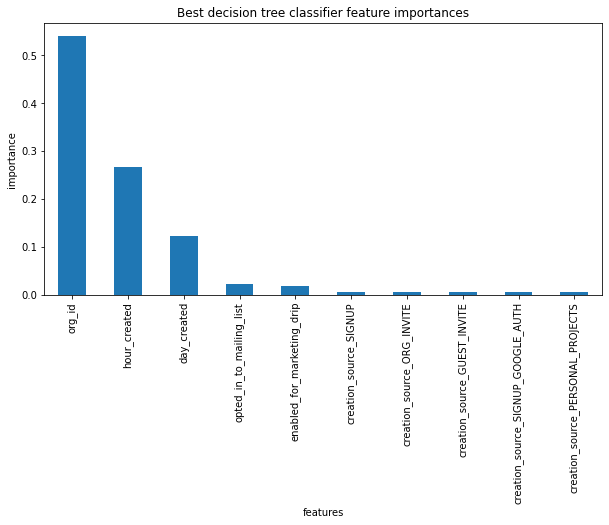

In [53]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 5))
imps_rf = rf_grid.best_estimator_._final_estimator.feature_importances_
DT_imps = pd.Series(imps_rf, index=X_train.columns).sort_values(ascending=False)
DT_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best decision tree classifier feature importances');

Based on these results, organization id and the hour and week day that account was created was very important in determining adopted users.